In [123]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

dataset=pd.read_csv("train_set.tsv", sep='\t', header=0)
dataset_numpy=dataset.to_numpy()




In [124]:

collisions=dataset_numpy[:,-2]

scaler = MinMaxScaler()
scaler.fit(dataset_numpy)
dataset_numpy=scaler.transform(dataset_numpy)
dataset_numpy[:,-2]=collisions




In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(750, 35) (750, 2) (250, 35) (250, 2)


In [130]:

from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train[:,0])

#there is a lot of overfitting because decision trees try to memorize the dataset so i try to use random forest to tackle this problem 

DecisionTreeClassifier()

F1 score train:  1.0
Precision score train:  1.0
Recall score train:  1.0


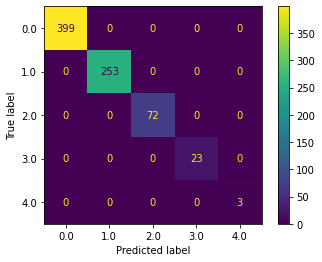

In [133]:
y_pred=model.predict(x_train)
print("F1 score train: ",f1_score(y_train[:,0],y_pred,average='micro'))
print("Precision score train: ",precision_score(y_train[:,0],y_pred,average='micro'))
print("Recall score train: ",recall_score(y_train[:,0],y_pred,average='micro'))
cm=confusion_matrix(y_train[:,0],y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()


F1 score test:  0.428
Precision score test:  0.428
Recall score test:  0.428


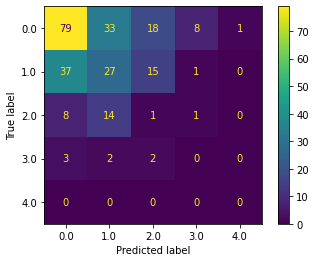

In [134]:
y_pred=model.predict(x_test)
print("F1 score test: ",f1_score(y_test[:,0],y_pred,average='micro'))
print("Precision score test: ",precision_score(y_test[:,0],y_pred,average='micro'))
print("Recall score test: ",recall_score(y_test[:,0],y_pred,average='micro'))
cm=confusion_matrix(y_test[:,0],y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [135]:
model=tree.DecisionTreeRegressor()
model.fit(x_train,y_train[:,0])

DecisionTreeRegressor()